In [1]:
import sys
sys.path.insert(0, '../')
import json
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import Point
from src.config import PARAM, PATH_SHAPES, PATH_RESULTS
from src.geo_data import load_rest_countries

In [15]:
loc = 'world'
basemap = geopandas.read_file(PATH_SHAPES / loc)
basemap = basemap[basemap.CNTR_ID != 'AQ']
basemap = basemap.to_crs({'init': 'epsg:3395'}) # mercator

In [16]:
countries = load_rest_countries()
with open('../alts_countries.json', 'r') as f:
    alts = json.loads(f.read())

In [17]:
df = pd.read_pickle(PATH_RESULTS / 'df_attribute_counts.pkl').xs('countries', level=0)
df = df.rename(columns={'index': 'naam'})

def rename_alts(x, alts):    
    for key in alts:
        if x in alts[key]:
            return key
    return x

df = df.reset_index()
df['index'] = df['index'].apply(lambda x: rename_alts(x, alts))
df = df.groupby('index').sum().reset_index()
df['CNTR_ID'] = df['index'].apply(lambda i: countries[i]['alpha2Code'])
df.loc[df['CNTR_ID'] == 'GB', 'CNTR_ID'] = 'UK'

In [19]:
chloro = basemap.merge(df, on='CNTR_ID')

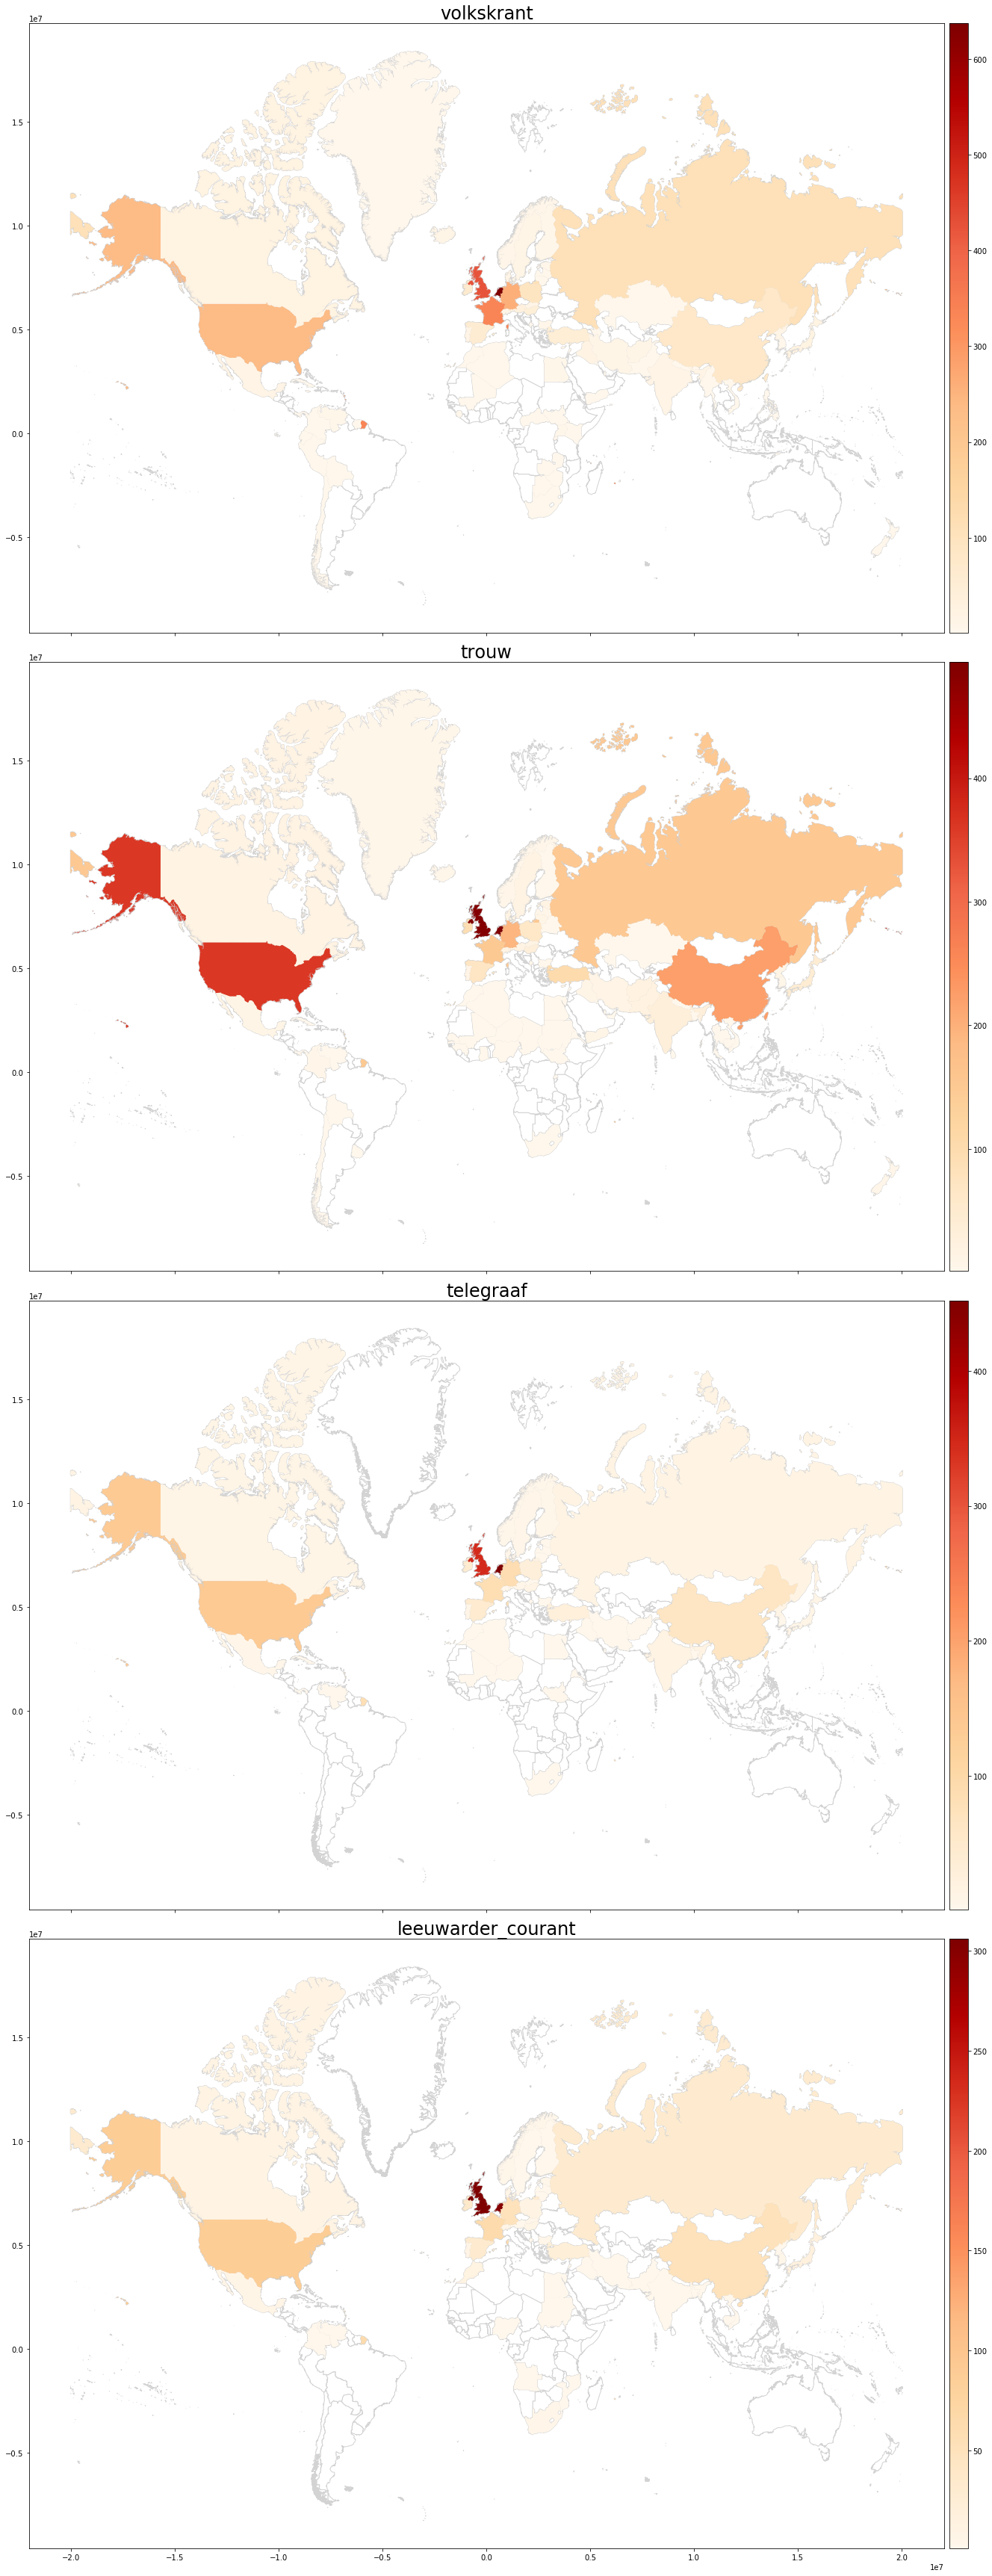

In [20]:
fig, axs = plt.subplots(4, 1, sharex=True, sharey=True, figsize=(32, 48))
for ax, batch in zip(axs.reshape(-1), PARAM.lexisnexis.batches):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.1)
    basemap.plot(ax=ax, color='w', edgecolor='lightgray')
    chloro.loc[chloro[batch] > 0].plot(column=batch, ax=ax, cmap='OrRd', legend=True, cax=cax)
    ax.set_title(batch, fontdict={'fontsize':24})
plt.savefig(PATH_RESULTS / f"countries_world.png")
plt.tight_layout() 

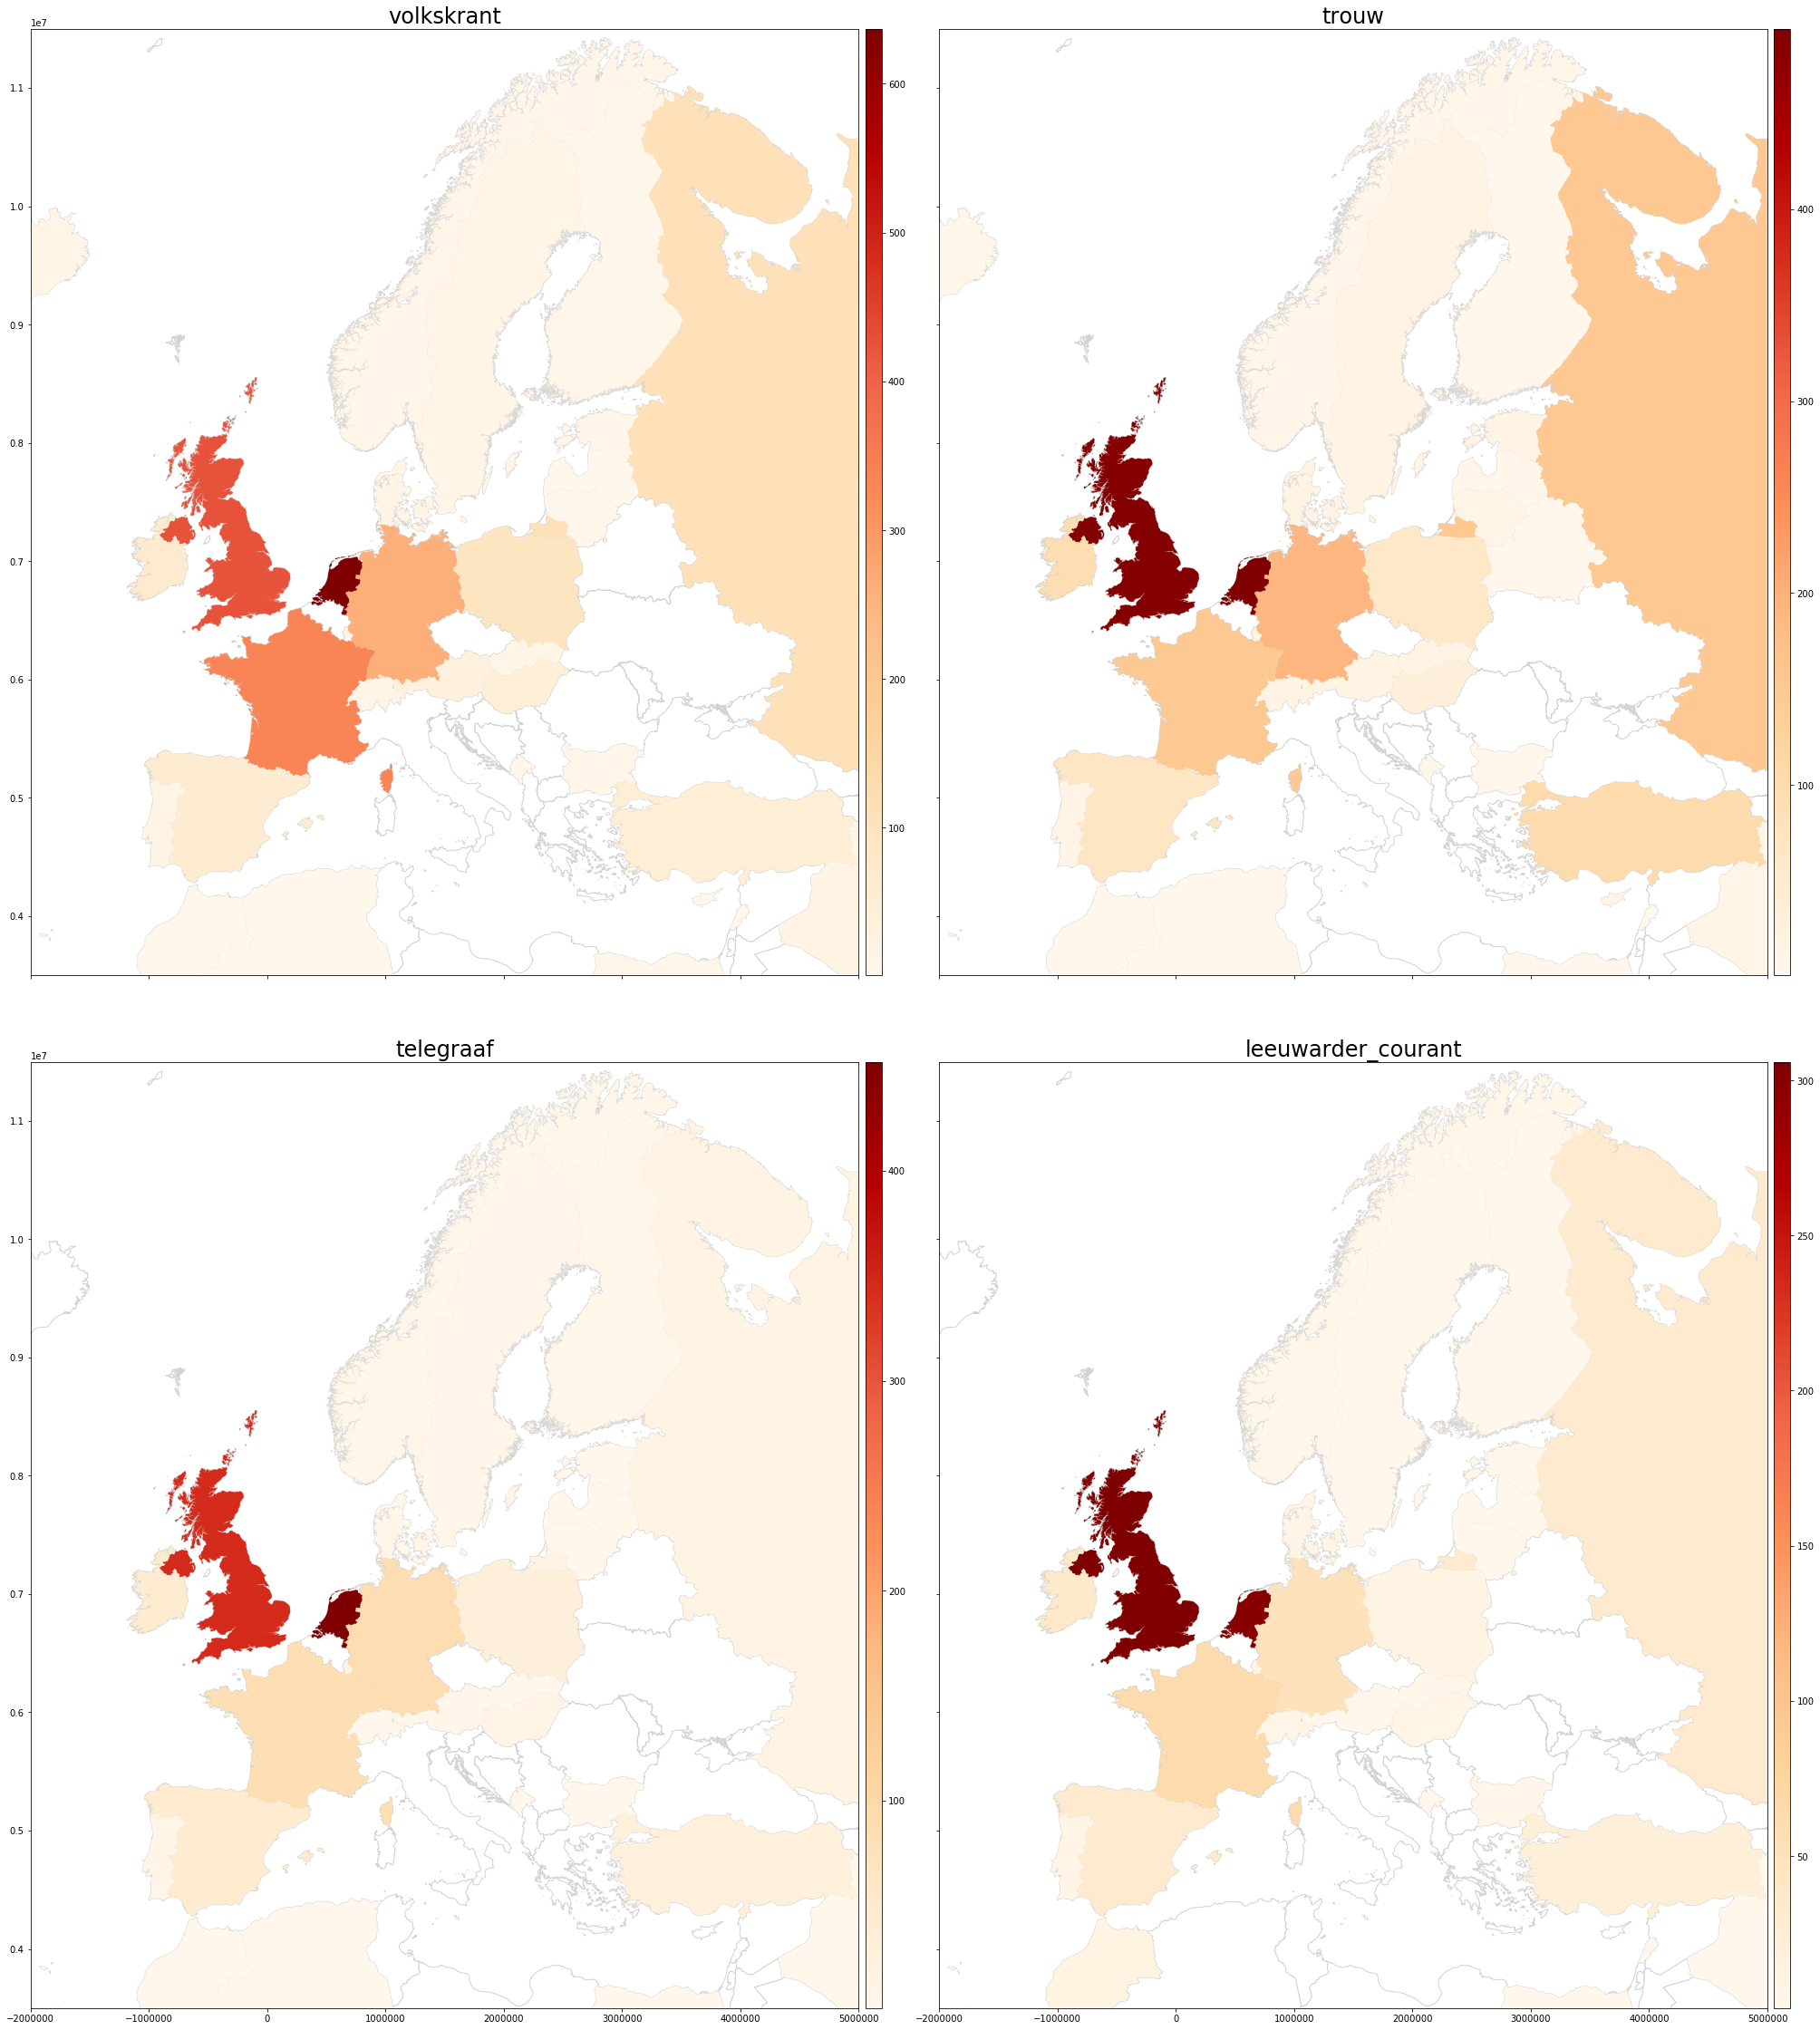

In [21]:
n=1e7
limitx = [-0.2 * n, 0.5 * n]
limity = [0.35 * n, 1.15 * n]

# limitx = [-20, 50]
# limity = [35, 85]

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(28, 32))
for ax, batch in zip(axs.reshape(-1), PARAM.lexisnexis.batches):
    ax.set_xlim(limitx)
    ax.set_ylim(limity)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.1)
    basemap.plot(ax=ax, color='w', edgecolor='lightgray')
    chloro.loc[chloro[batch] > 0].plot(column=batch, ax=ax, cmap='OrRd', legend=True, cax=cax)
    ax.set_title(batch, fontdict={'fontsize':24})
plt.savefig(PATH_RESULTS / f"countries_europe.png")
plt.tight_layout() 